# Metrics and Plots for the trained models

In [2]:
import os
os.chdir(os.path.dirname(os.getcwd())) if os.getcwd().endswith('notebooks') else None

MAIN_DUMP='dump/'

import pandas as pd
from evaluator import Evaluator
from collector import ResultsCollector
from visualizer import DashboardVisualizer
from joblib import load

## v2.9

In [3]:
ALL_MODELS_v2_9={}
dump_dir=MAIN_DUMP+'v2.9/'
for joblib_file in os.listdir(dump_dir):
    if joblib_file.endswith('_MLmodel.joblib'):
        model_path=os.path.join(dump_dir, joblib_file)
        print(f'-- loading model from {model_path}')
        model_loaded=load(model_path)
        ALL_MODELS_v2_9[joblib_file.replace('_MLmodel.joblib','')]=model_loaded

-- loading model from dump/v2.9/mlp_Complex_protein_embeddings_MLmodel.joblib
-- loading model from dump/v2.9/mlp_Complex_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.9/mlp_concatenated_protein_embeddings_MLmodel.joblib
-- loading model from dump/v2.9/mlp_concatenated_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.9/mlp_gene_expression_MLmodel.joblib
-- loading model from dump/v2.9/mlp_RGCN_protein_embeddings_MLmodel.joblib
-- loading model from dump/v2.9/mlp_RGCN_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.9/svm_Complex_protein_embeddings_MLmodel.joblib
-- loading model from dump/v2.9/svm_Complex_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.9/svm_concatenated_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.9/svm_gene_expression_MLmodel.joblib
-- loading model from dump/v2.9/svm_RGCN_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.9/xgboost_Complex_protein_embeddings_MLmodel.joblib
-- l

In [11]:
collector = ResultsCollector()
metrics_list = []

for model_name, ml_model in ALL_MODELS_v2_9.items():
    print(f'-- Evaluating model: {model_name} v2.9 --')
    y_test, y_pred, y_proba = ml_model.y_test, ml_model.y_pred, ml_model.y_proba
    metrics = Evaluator(y_test, y_pred, y_proba).compute_metrics()
    metrics_list.append({
            "model": ml_model.model_type,
            "input": '_'.join(ml_model.dataset_name.split('_')[1:]+['v2.9']),
            **metrics
    })

    collector.add(ml_model.model_type, '_'.join(ml_model.dataset_name.split('_')[1:]+['v2.9']), y_test, y_pred, y_proba)
results_df_v2_9 = pd.DataFrame(metrics_list)
# -- sort it by input and model
results_df_v2_9 = results_df_v2_9.sort_values(by=['input','model']).reset_index(drop=True)

-- Evaluating model: mlp_Complex_protein_embeddings v2.9 --
-- Evaluating model: mlp_Complex_sample_embeddings v2.9 --
-- Evaluating model: mlp_concatenated_protein_embeddings v2.9 --
-- Evaluating model: mlp_concatenated_sample_embeddings v2.9 --
-- Evaluating model: mlp_gene_expression v2.9 --
-- Evaluating model: mlp_RGCN_protein_embeddings v2.9 --
-- Evaluating model: mlp_RGCN_sample_embeddings v2.9 --
-- Evaluating model: svm_Complex_protein_embeddings v2.9 --
-- Evaluating model: svm_Complex_sample_embeddings v2.9 --
-- Evaluating model: svm_concatenated_sample_embeddings v2.9 --
-- Evaluating model: svm_gene_expression v2.9 --


/home/raysas/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


-- Evaluating model: svm_RGCN_sample_embeddings v2.9 --
-- Evaluating model: xgboost_Complex_protein_embeddings v2.9 --
-- Evaluating model: xgboost_Complex_sample_embeddings v2.9 --
-- Evaluating model: xgboost_concatenated_protein_embeddings v2.9 --
-- Evaluating model: xgboost_concatenated_sample_embeddings v2.9 --
-- Evaluating model: xgboost_gene_expression v2.9 --
-- Evaluating model: xgboost_RGCN_protein_embeddings v2.9 --
-- Evaluating model: xgboost_RGCN_sample_embeddings v2.9 --


In [12]:
results_df_v2_9

model                                 input  balanced_accuracy  \
0       mlp       Complex_protein_embeddings_v2.9           0.888889   
1       svm       Complex_protein_embeddings_v2.9           0.833333   
2   xgboost       Complex_protein_embeddings_v2.9           0.944444   
3       mlp        Complex_sample_embeddings_v2.9           0.666667   
4       svm        Complex_sample_embeddings_v2.9           0.500000   
5   xgboost        Complex_sample_embeddings_v2.9           0.666667   
6       mlp          RGCN_protein_embeddings_v2.9           0.500000   
7   xgboost          RGCN_protein_embeddings_v2.9           0.833333   
8       mlp           RGCN_sample_embeddings_v2.9           0.500000   
9       svm           RGCN_sample_embeddings_v2.9           0.500000   
10  xgboost           RGCN_sample_embeddings_v2.9           0.611111   
11      mlp  concatenated_protein_embeddings_v2.9           0.500000   
12  xgboost  concatenated_protein_embeddings_v2.9           0.944444   
13      mlp   concatenated_sample_embeddings_v2.9           0.500000   
14      svm   concatenated_sample_embeddings_v2.9           0.500000   
15  xgboost   concatenated_sample_embeddings_v2.9           0.611111   
16      mlp                  gene_expression_v2.9           0.500000   
17      svm                  gene_expression_v2.9           1.000000   
18  xgboost                  gene_expression_v2.9           0.833333   

    precision  recall        f1       mcc     auroc     auprc     brier  
0    0.923077     1.0  0.960000  0.847319  1.000000  1.000000  0.033064  
1    0.888889     1.0  0.941176  0.769800  1.000000  1.000000  0.032236  
2    0.960000     1.0  0.979592  0.923760  0.990741  0.996597  0.036624  
3    0.800000     1.0  0.888889  0.516398  0.870370  0.948028  0.161098  
4    0.727273     1.0  0.842105  0.000000  0.782407  0.902813  0.151732  
5    0.800000     1.0  0.888889  0.516398  0.875000  0.941559  0.151568  
6    0.727273     1.0  0.842105  0.000000  0.500000  0.727273  0.272727  
7    0.888889     1.0  0.941176  0.769800  0.879630  0.947915  0.097445  
8    0.727273     1.0  0.842105  0.000000  0.500000  0.727273  0.248354  
9    0.727273     1.0  0.842105  0.000000  0.476852  0.703420  0.202266  
10   0.774194     1.0  0.872727  0.414781  0.759259  0.902695  0.180927  
11   0.727273     1.0  0.842105  0.000000  0.500000  0.727273  0.272727  
12   0.960000     1.0  0.979592  0.923760  0.986111  0.994786  0.034222  
13   0.727273     1.0  0.842105  0.000000  0.500000  0.727273  0.247038  
14   0.727273     1.0  0.842105  0.000000  0.518519  0.732810  0.203251  
15   0.774194     1.0  0.872727  0.414781  0.939815  0.977856  0.153205  
16   0.000000     0.0  0.000000  0.000000  0.500000  0.727273  0.260310  
17   1.000000     1.0  1.000000  1.000000  1.000000  1.000000  0.009119  
18   0.888889     1.0  0.941176  0.769800  0.995370  0.998333  0.049672

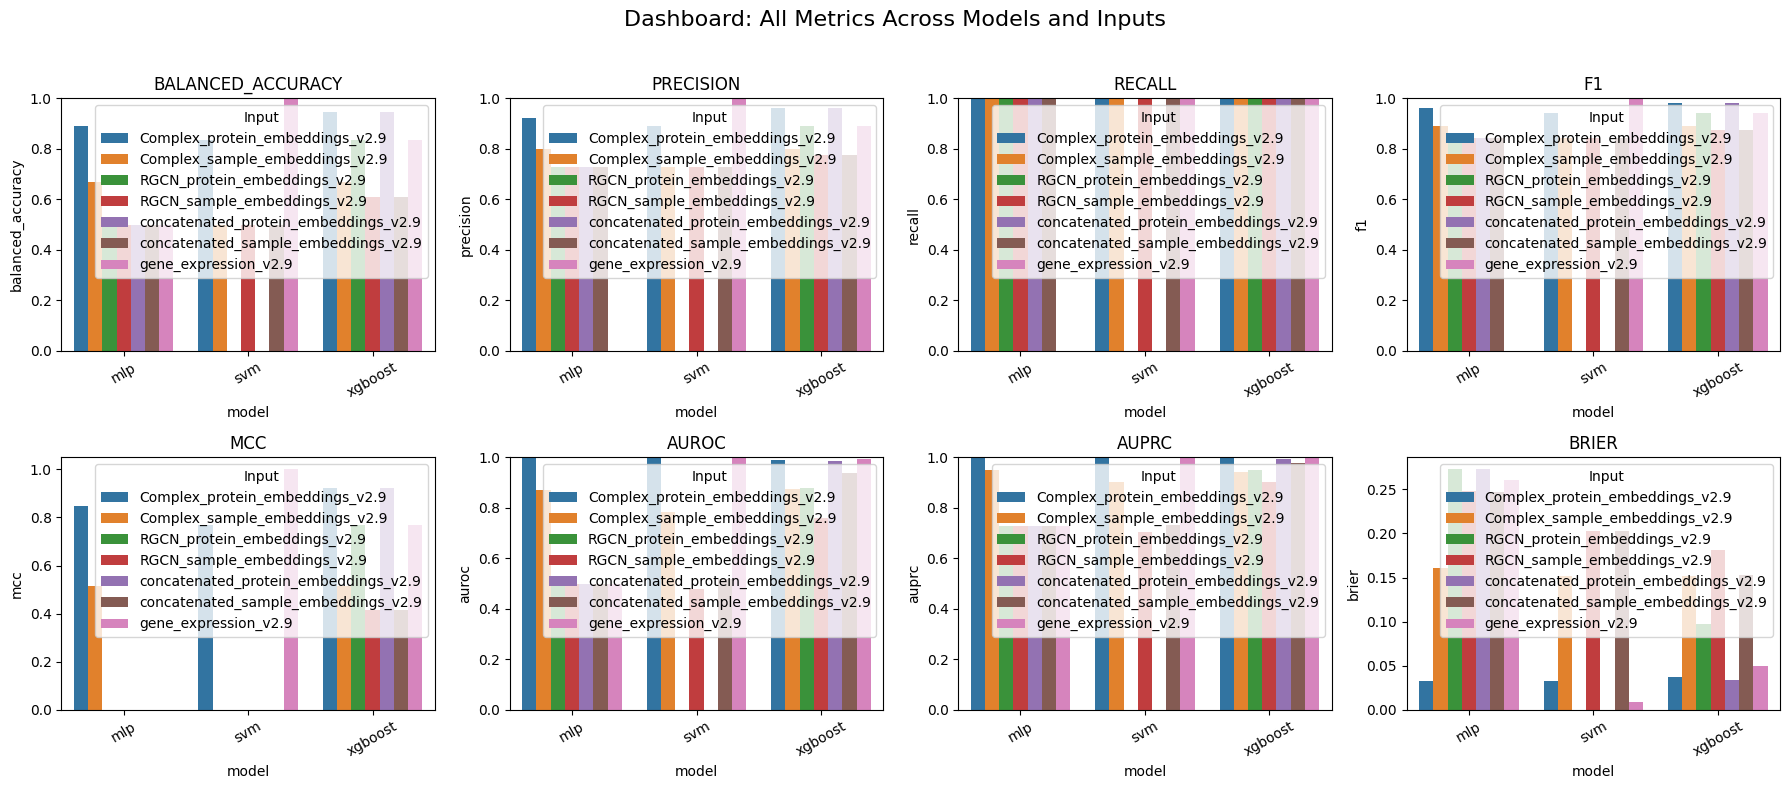

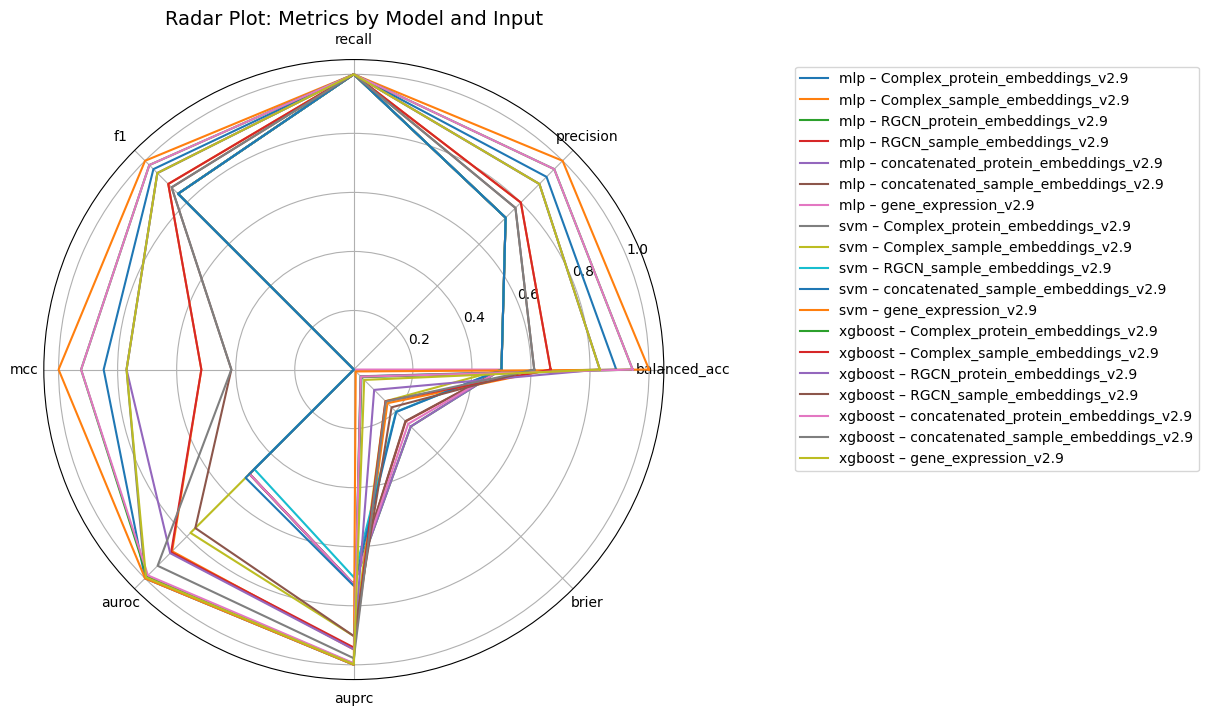

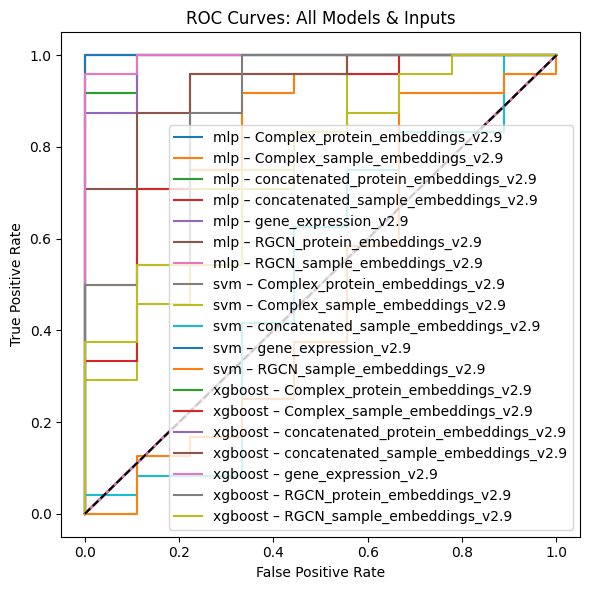

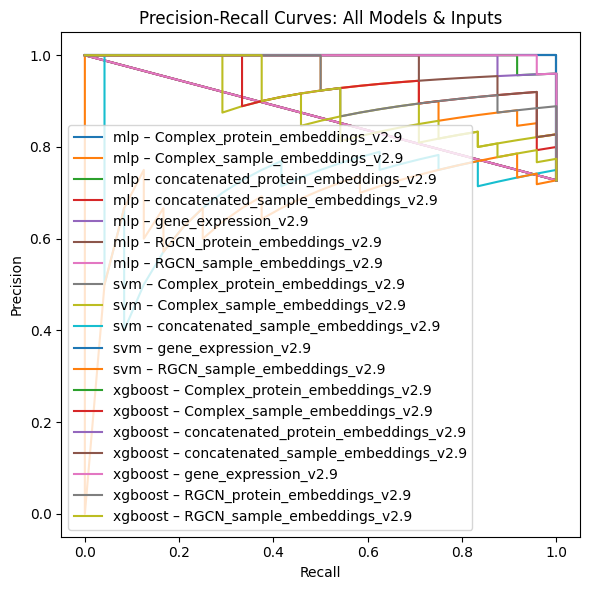

In [13]:
dashboard = DashboardVisualizer(results_df_v2_9, collector)
dashboard.plot_metric_grid()
dashboard.plot_radar()
dashboard.plot_roc_curves()
dashboard.plot_pr_curves()


## v2.10

-- loading model from dump/v2.10/mlp_Complex_protein_embeddings_MLmodel.joblib
-- loading model from dump/v2.10/mlp_Complex_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.10/mlp_concatenated_protein_embeddings_MLmodel.joblib
-- loading model from dump/v2.10/mlp_concatenated_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.10/mlp_RGCN_protein_embeddings_MLmodel.joblib
-- loading model from dump/v2.10/mlp_RGCN_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.10/svm_Complex_protein_embeddings_MLmodel.joblib
-- loading model from dump/v2.10/svm_Complex_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.10/svm_concatenated_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.10/svm_RGCN_sample_embeddings_MLmodel.joblib


-- loading model from dump/v2.10/xgboost_Complex_protein_embeddings_MLmodel.joblib
-- loading model from dump/v2.10/xgboost_Complex_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.10/xgboost_concatenated_protein_embeddings_MLmodel.joblib
-- loading model from dump/v2.10/xgboost_concatenated_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.10/xgboost_RGCN_protein_embeddings_MLmodel.joblib
-- loading model from dump/v2.10/xgboost_RGCN_sample_embeddings_MLmodel.joblib
-- Evaluating model: mlp_Complex_protein_embeddings v2.10 --
-- Evaluating model: mlp_Complex_sample_embeddings v2.10 --
-- Evaluating model: mlp_concatenated_protein_embeddings v2.10 --
-- Evaluating model: mlp_concatenated_sample_embeddings v2.10 --
-- Evaluating model: mlp_RGCN_protein_embeddings v2.10 --
-- Evaluating model: mlp_RGCN_sample_embeddings v2.10 --
-- Evaluating model: svm_Complex_protein_embeddings v2.10 --
-- Evaluating model: svm_Complex_sample_embeddings v2.10 --
-- Evaluating

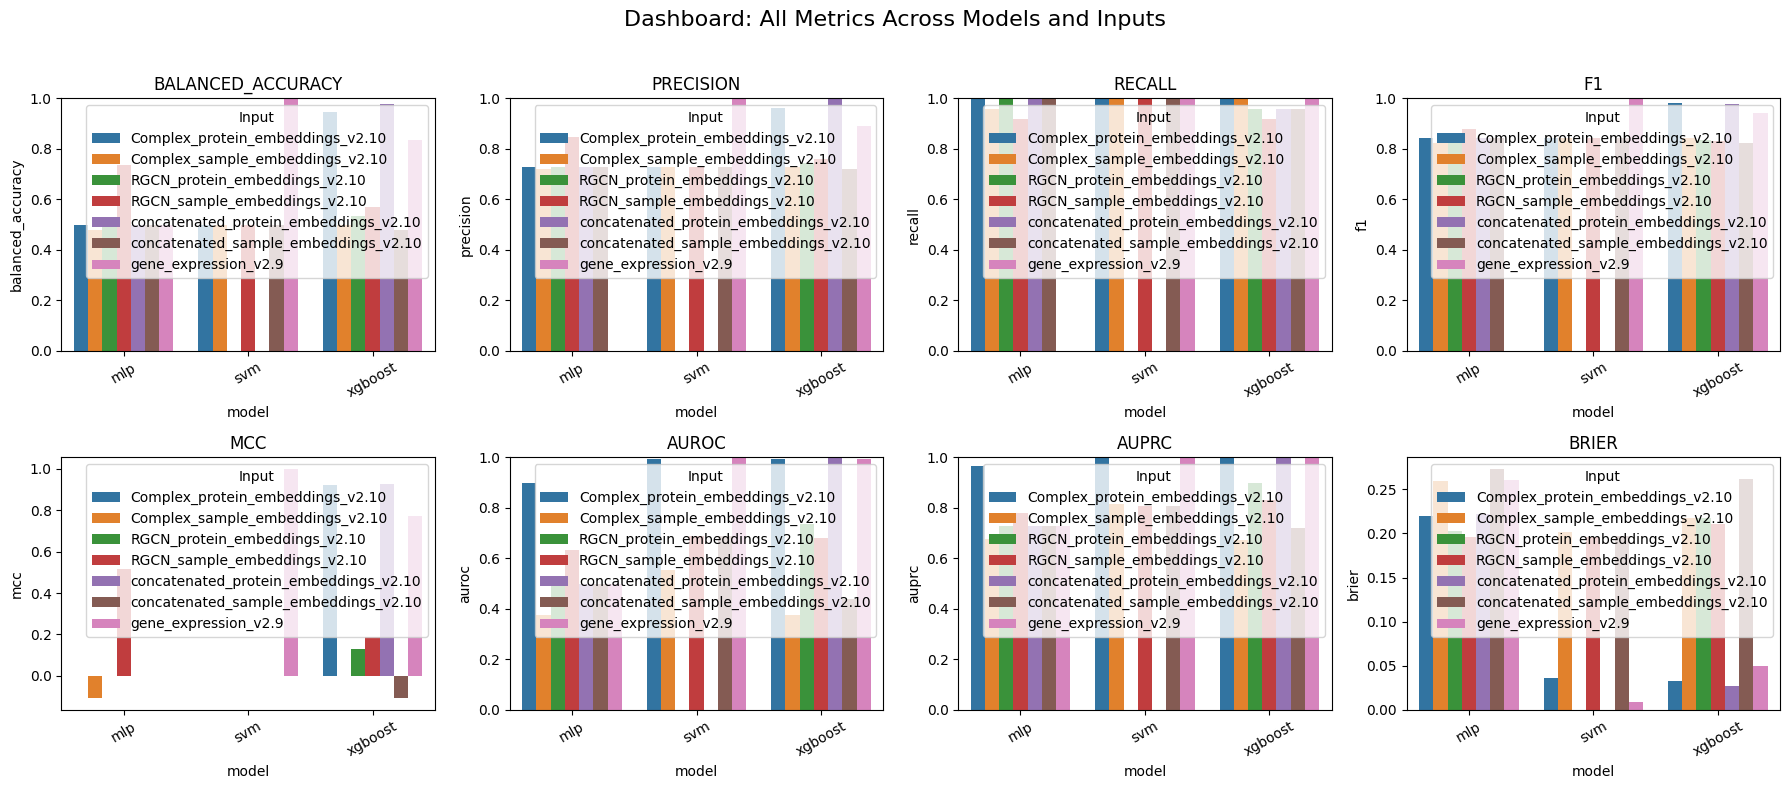

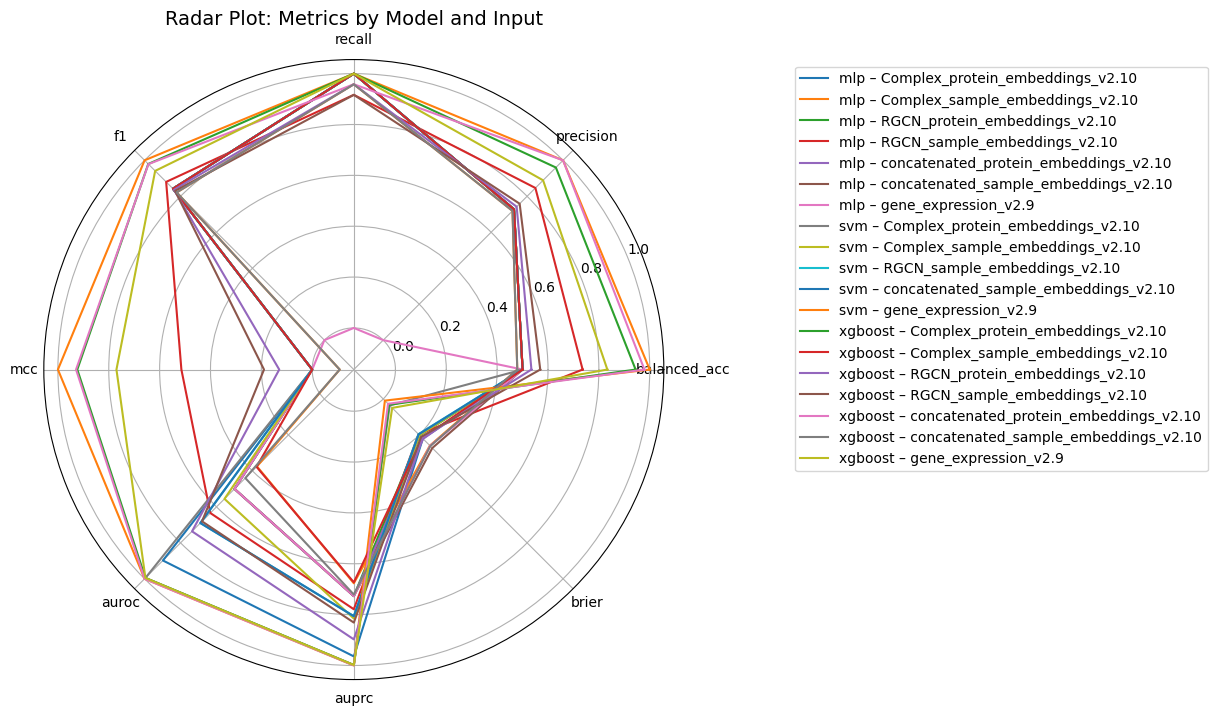

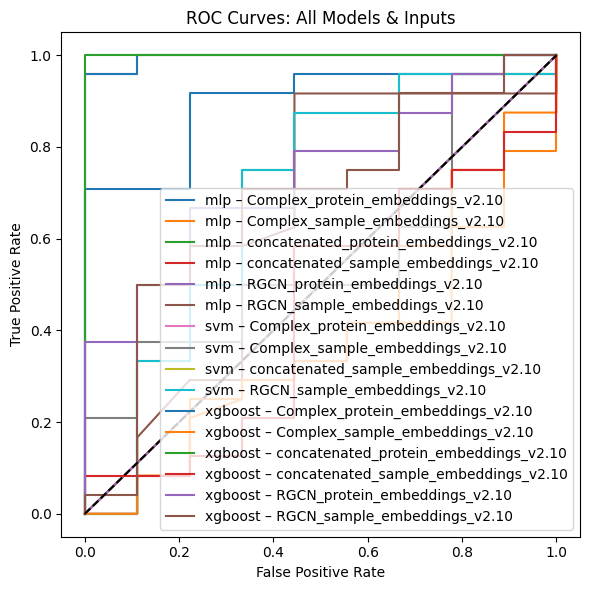

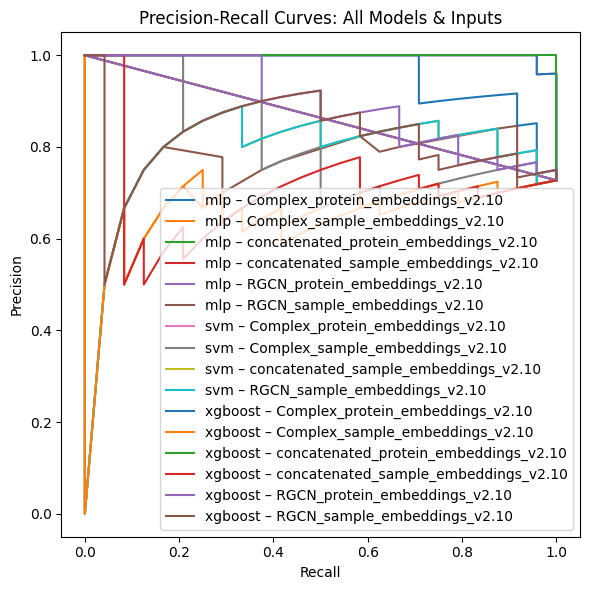

In [14]:
# -- same code

## v2.10
ALL_MODELS_v2_10={}
dump_dir=MAIN_DUMP+'v2.10/'
for joblib_file in os.listdir(dump_dir):
    if joblib_file.endswith('_MLmodel.joblib'):
        model_path=os.path.join(dump_dir, joblib_file)
        print(f'-- loading model from {model_path}')
        model_loaded=load(model_path)
        ALL_MODELS_v2_10[joblib_file.replace('_MLmodel.joblib','')]=model_loaded

collector = ResultsCollector()
metrics_list = []

for model_name, ml_model in ALL_MODELS_v2_10.items():
    print(f'-- Evaluating model: {model_name} v2.10 --')
    y_test, y_pred, y_proba = ml_model.y_test, ml_model.y_pred, ml_model.y_proba
    metrics = Evaluator(y_test, y_pred, y_proba).compute_metrics()
    metrics_list.append({
            "model": ml_model.model_type,
            "input": '_'.join(ml_model.dataset_name.split('_')[1:]+['v2.10']),
            **metrics
    })

    collector.add(ml_model.model_type, '_'.join(ml_model.dataset_name.split('_')[1:]+['v2.10']), y_test, y_pred, y_proba)
results_df_v2_10 = pd.DataFrame(metrics_list)

# -- add ros with input starting gene_expression from v2.9 to results_df_v2_10
for index, row in results_df_v2_9.iterrows():
    if row['input'].startswith('gene_expression'):
        results_df_v2_10 = pd.concat([results_df_v2_10, pd.DataFrame([row])], ignore_index=True)

results_df_v2_10 = results_df_v2_10.sort_values(by=['input','model']).reset_index(drop=True)

dashboard = DashboardVisualizer(results_df_v2_10, collector)
dashboard.plot_metric_grid()
dashboard.plot_radar()
dashboard.plot_roc_curves()
dashboard.plot_pr_curves()

## v2.11

-- loading model from dump/v2.11/mlp_Complex_protein_embeddings_MLmodel.joblib
-- loading model from dump/v2.11/mlp_Complex_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.11/mlp_concatenated_protein_embeddings_MLmodel.joblib
-- loading model from dump/v2.11/mlp_concatenated_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.11/mlp_RGCN_protein_embeddings_MLmodel.joblib
-- loading model from dump/v2.11/mlp_RGCN_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.11/svm_Complex_protein_embeddings_MLmodel.joblib
-- loading model from dump/v2.11/svm_Complex_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.11/svm_concatenated_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.11/svm_RGCN_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.11/xgboost_Complex_protein_embeddings_MLmodel.joblib
-- loading model from dump/v2.11/xgboost_Complex_sample_embeddings_MLmodel.joblib
-- loading model from dump/v2.11/xgboost_conc

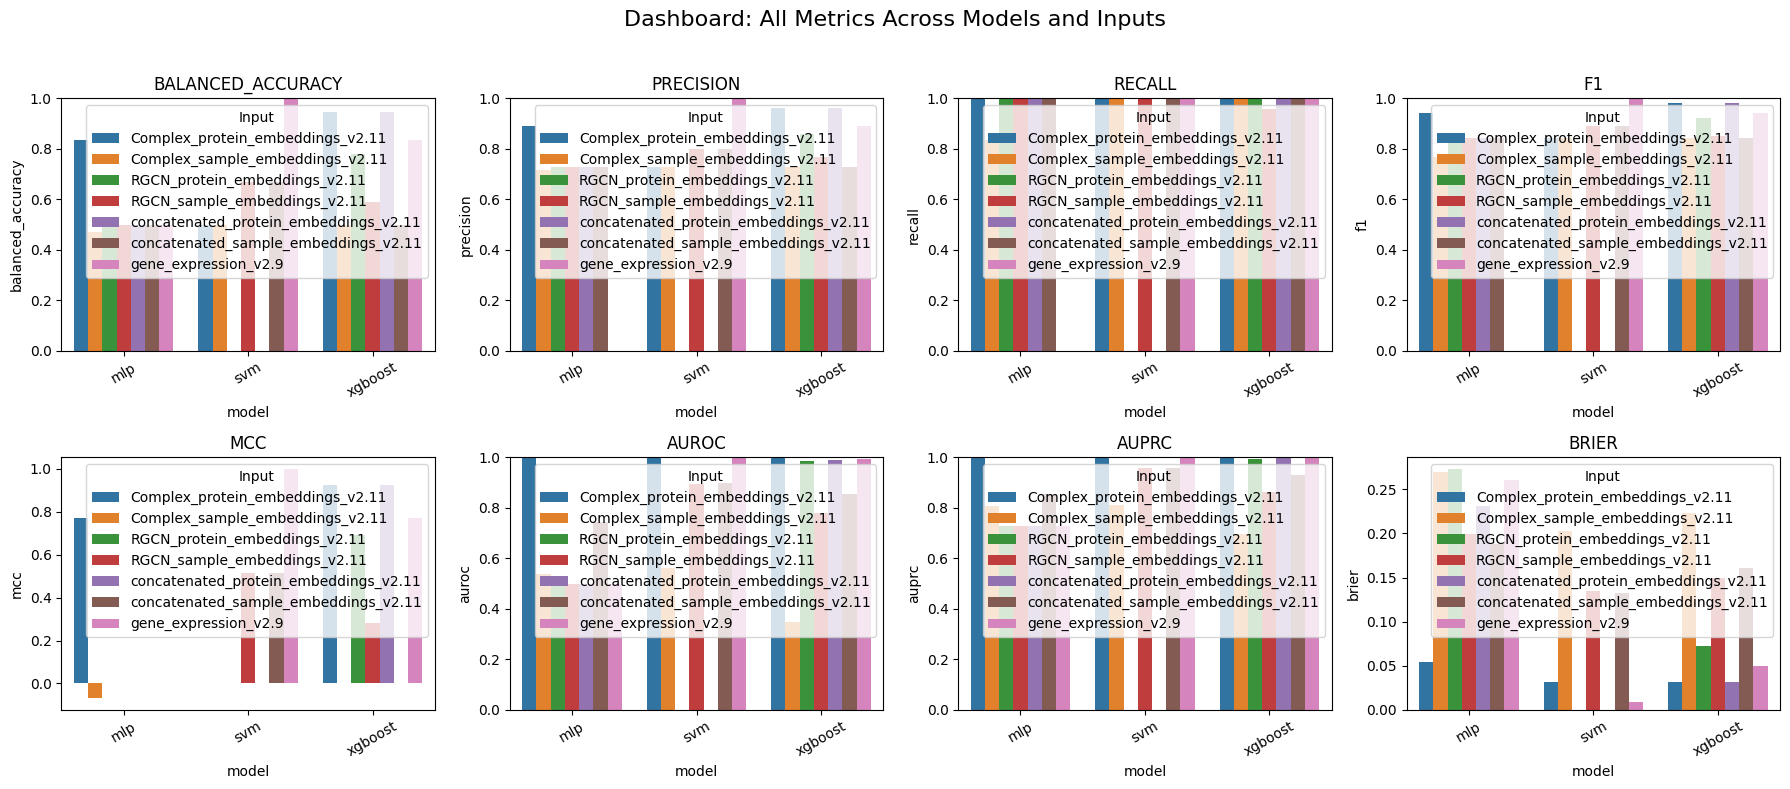

ValueError: x and y must have same first dimension, but have shapes (9,) and (17,)

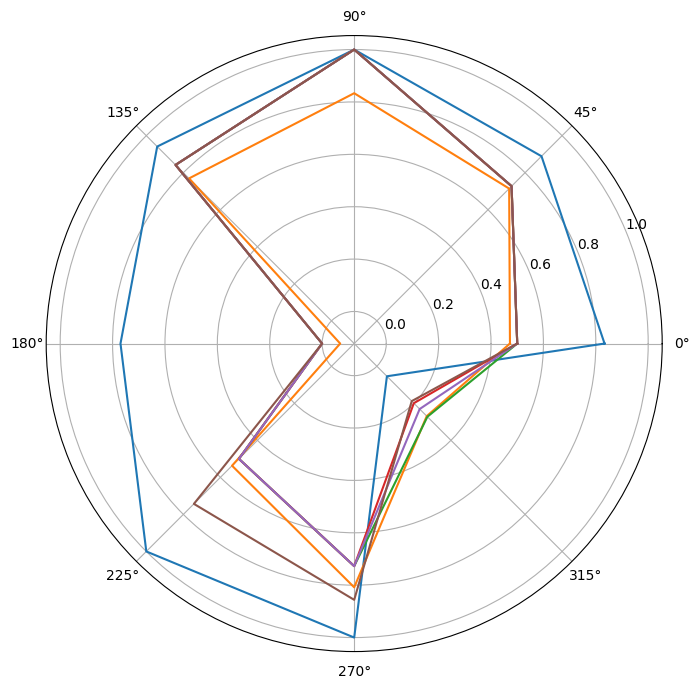

In [19]:
# -- same code
## v2.11
ALL_MODELS_v2_11={}
dump_dir=MAIN_DUMP+'v2.11/'
for joblib_file in os.listdir(dump_dir):
    if joblib_file.endswith('_MLmodel.joblib'):
        model_path=os.path.join(dump_dir, joblib_file)
        print(f'-- loading model from {model_path}')
        model_loaded=load(model_path)
        ALL_MODELS_v2_11[joblib_file.replace('_MLmodel.joblib','')]=model_loaded
collector = ResultsCollector()
metrics_list = []

for model_name, ml_model in ALL_MODELS_v2_11.items():
    print(f'-- Evaluating model: {model_name} v2.11 --')
    y_test, y_pred, y_proba = ml_model.y_test, ml_model.y_pred, ml_model.y_proba
    metrics = Evaluator(y_test, y_pred, y_proba).compute_metrics()
    metrics_list.append({
            "model": ml_model.model_type,
            "input": '_'.join(ml_model.dataset_name.split('_')[1:]+['v2.11']),
            **metrics
    })

    collector.add(ml_model.model_type, '_'.join(ml_model.dataset_name.split('_')[1:]+['v2.11']), y_test, y_pred, y_proba)
results_df_v2_11 = pd.DataFrame(metrics_list)

# -- add ros with input starting gene_expression from v2.9 and v2.10 to results_df_v2_11
for index, row in results_df_v2_9.iterrows():
    if row['input'].startswith('gene_expression'):
        results_df_v2_11 = pd.concat([results_df_v2_11, pd.DataFrame([row])], ignore_index=True)
for index, row in results_df_v2_10.iterrows():
    if row['input'].startswith('gene_expression'):
        results_df_v2_11 = pd.concat([results_df_v2_11, pd.DataFrame([row])], ignore_index=True)    
        

# -- sort it by input and model
results_df_v2_11 = results_df_v2_11.sort_values(by=['input','model']).reset_index(drop=True)
results_df_v2_11
dashboard = DashboardVisualizer(results_df_v2_11, collector)
dashboard.plot_metric_grid()
dashboard.plot_radar()
dashboard.plot_roc_curves()
dashboard.plot_pr_curves()  

## comparing versions

In [21]:
results_df=pd.concat([results_df_v2_9.assign(version='v2.9'), results_df_v2_10.assign(version='v2.10'), results_df_v2_11.assign(version='v2.11')], ignore_index=True)
results_df=results_df.sort_values(by=['input','model','version']).reset_index(drop=True)
# -- remove duplicates if any
results_df = results_df.drop_duplicates(subset=['input','model'])
results_df

model                                  input  balanced_accuracy  \
0       mlp       Complex_protein_embeddings_v2.10           0.500000   
1       svm       Complex_protein_embeddings_v2.10           0.500000   
2   xgboost       Complex_protein_embeddings_v2.10           0.944444   
3       mlp       Complex_protein_embeddings_v2.11           0.833333   
4       svm       Complex_protein_embeddings_v2.11           0.500000   
5   xgboost       Complex_protein_embeddings_v2.11           0.944444   
6       mlp        Complex_protein_embeddings_v2.9           0.888889   
7       svm        Complex_protein_embeddings_v2.9           0.833333   
8   xgboost        Complex_protein_embeddings_v2.9           0.944444   
9       mlp        Complex_sample_embeddings_v2.10           0.479167   
10      svm        Complex_sample_embeddings_v2.10           0.500000   
11  xgboost        Complex_sample_embeddings_v2.10           0.500000   
12      mlp        Complex_sample_embeddings_v2.11           0.472222   
13      svm        Complex_sample_embeddings_v2.11           0.500000   
14  xgboost        Complex_sample_embeddings_v2.11           0.500000   
15      mlp         Complex_sample_embeddings_v2.9           0.666667   
16      svm         Complex_sample_embeddings_v2.9           0.500000   
17  xgboost         Complex_sample_embeddings_v2.9           0.666667   
18      mlp          RGCN_protein_embeddings_v2.10           0.500000   
19  xgboost          RGCN_protein_embeddings_v2.10           0.534722   
20      mlp          RGCN_protein_embeddings_v2.11           0.500000   
21  xgboost          RGCN_protein_embeddings_v2.11           0.777778   
22      mlp           RGCN_protein_embeddings_v2.9           0.500000   
23  xgboost           RGCN_protein_embeddings_v2.9           0.833333   
24      mlp           RGCN_sample_embeddings_v2.10           0.736111   
25      svm           RGCN_sample_embeddings_v2.10           0.500000   
26  xgboost           RGCN_sample_embeddings_v2.10           0.569444   
27      mlp           RGCN_sample_embeddings_v2.11           0.500000   
28      svm           RGCN_sample_embeddings_v2.11           0.666667   
29  xgboost           RGCN_sample_embeddings_v2.11           0.590278   
30      mlp            RGCN_sample_embeddings_v2.9           0.500000   
31      svm            RGCN_sample_embeddings_v2.9           0.500000   
32  xgboost            RGCN_sample_embeddings_v2.9           0.611111   
33      mlp  concatenated_protein_embeddings_v2.10           0.500000   
34  xgboost  concatenated_protein_embeddings_v2.10           0.979167   
35      mlp  concatenated_protein_embeddings_v2.11           0.500000   
36  xgboost  concatenated_protein_embeddings_v2.11           0.944444   
37      mlp   concatenated_protein_embeddings_v2.9           0.500000   
38  xgboost   concatenated_protein_embeddings_v2.9           0.944444   
39      mlp   concatenated_sample_embeddings_v2.10           0.500000   
40      svm   concatenated_sample_embeddings_v2.10           0.500000   
41  xgboost   concatenated_sample_embeddings_v2.10           0.479167   
42      mlp   concatenated_sample_embeddings_v2.11           0.500000   
43      svm   concatenated_sample_embeddings_v2.11           0.666667   
44  xgboost   concatenated_sample_embeddings_v2.11           0.500000   
45      mlp    concatenated_sample_embeddings_v2.9           0.500000   
46      svm    concatenated_sample_embeddings_v2.9           0.500000   
47  xgboost    concatenated_sample_embeddings_v2.9           0.611111   
48      mlp                   gene_expression_v2.9           0.500000   
52      svm                   gene_expression_v2.9           1.000000   
56  xgboost                   gene_expression_v2.9           0.833333   

    precision    recall        f1       mcc     auroc     auprc     brier  \
0    0.727273  1.000000  0.842105  0.000000  0.898148  0.964392  0.220174   
1    0.727273  1.000000  0.842105  0.000000  0.995370  

In [28]:
# -- comparing differen versions of comple protein embeddings
results_complex_proteins_df=results_df[results_df['input'].str.contains('Complex_protein')]

In [29]:
results_complex_proteins_df

model                             input  balanced_accuracy  precision  \
0      mlp  Complex_protein_embeddings_v2.10           0.500000   0.727273   
1      svm  Complex_protein_embeddings_v2.10           0.500000   0.727273   
2  xgboost  Complex_protein_embeddings_v2.10           0.944444   0.960000   
3      mlp  Complex_protein_embeddings_v2.11           0.833333   0.888889   
4      svm  Complex_protein_embeddings_v2.11           0.500000   0.727273   
5  xgboost  Complex_protein_embeddings_v2.11           0.944444   0.960000   
6      mlp   Complex_protein_embeddings_v2.9           0.888889   0.923077   
7      svm   Complex_protein_embeddings_v2.9           0.833333   0.888889   
8  xgboost   Complex_protein_embeddings_v2.9           0.944444   0.960000   

   recall        f1       mcc     auroc     auprc     brier version  
0     1.0  0.842105  0.000000  0.898148  0.964392  0.220174   v2.10  
1     1.0  0.842105  0.000000  0.995370  0.998333  0.035795   v2.10  
2     1.0  0.979592  0.923760  0.995370  0.998333  0.032461   v2.10  
3     1.0  0.941176  0.769800  1.000000  1.000000  0.054231   v2.11  
4     1.0  0.842105  0.000000  1.000000  1.000000  0.031636   v2.11  
5     1.0  0.979592  0.923760  1.000000  1.000000  0.031256   v2.11  
6     1.0  0.960000  0.847319  1.000000  1.000000  0.033064    v2.9  
7     1.0  0.941176  0.769800  1.000000  1.000000  0.032236    v2.9  
8     1.0  0.979592  0.923760  0.990741  0.996597  0.036624    v2.9

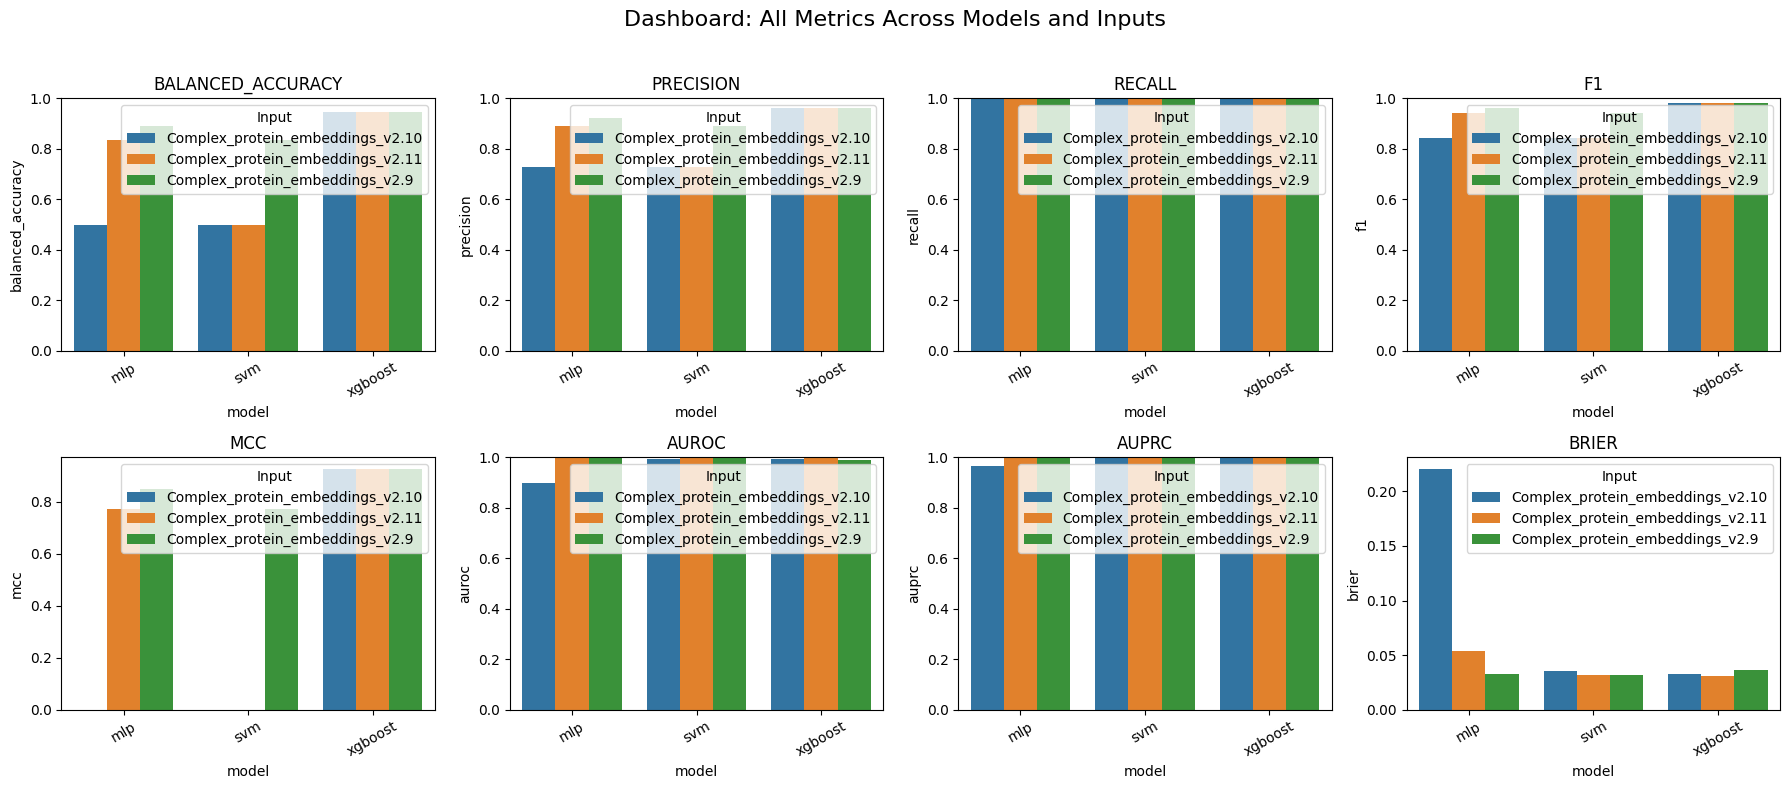

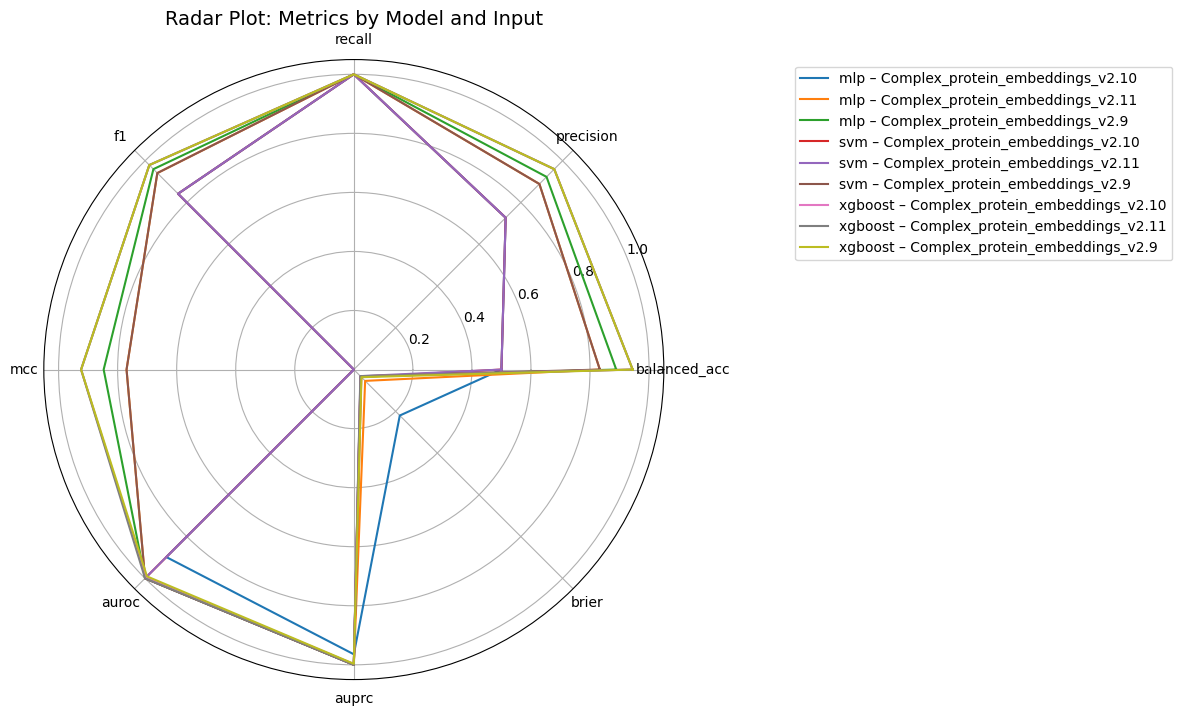

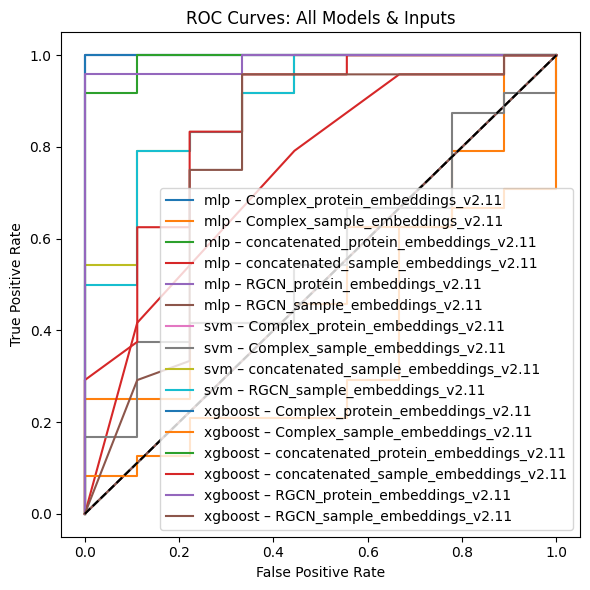

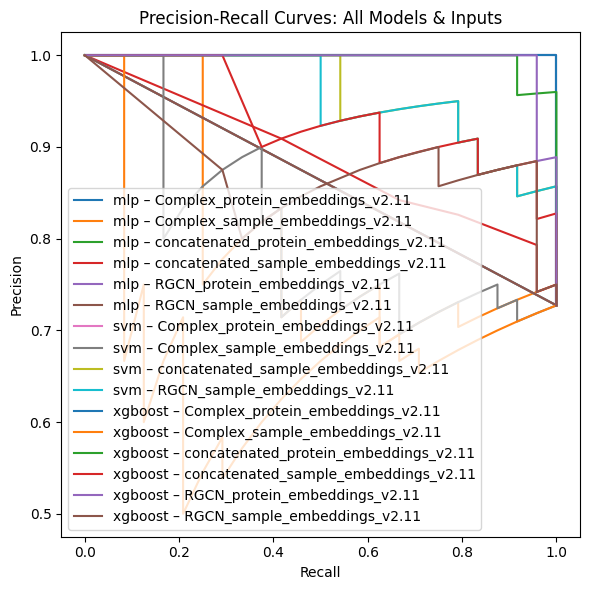

In [30]:
dashboard = DashboardVisualizer(results_complex_proteins_df, collector)
dashboard.plot_metric_grid()
dashboard.plot_radar()
dashboard.plot_roc_curves()
dashboard.plot_pr_curves()  

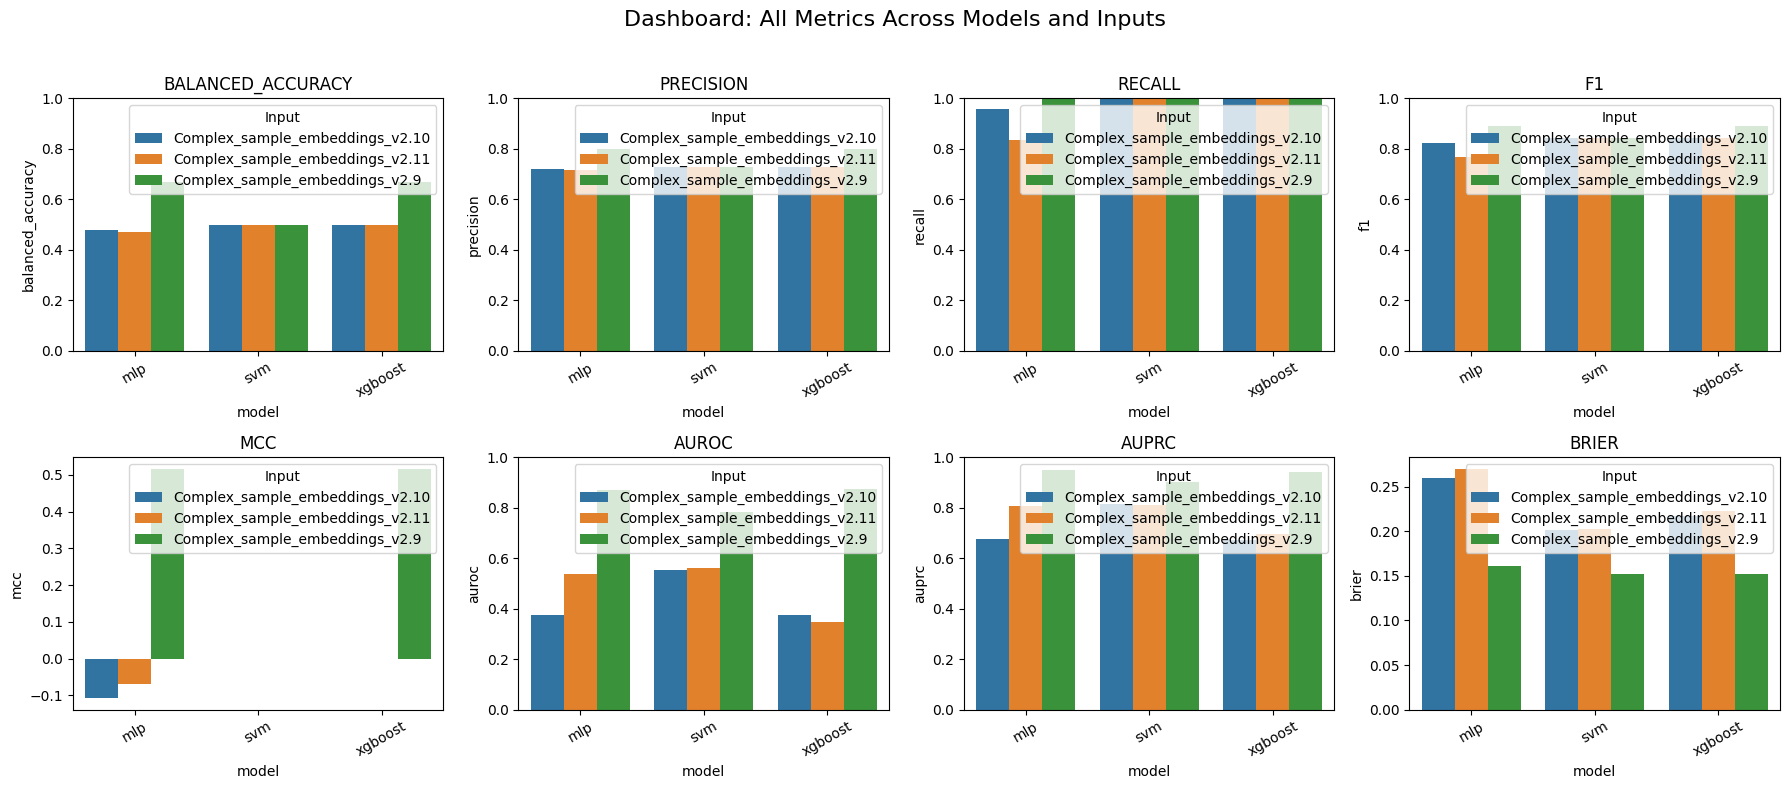

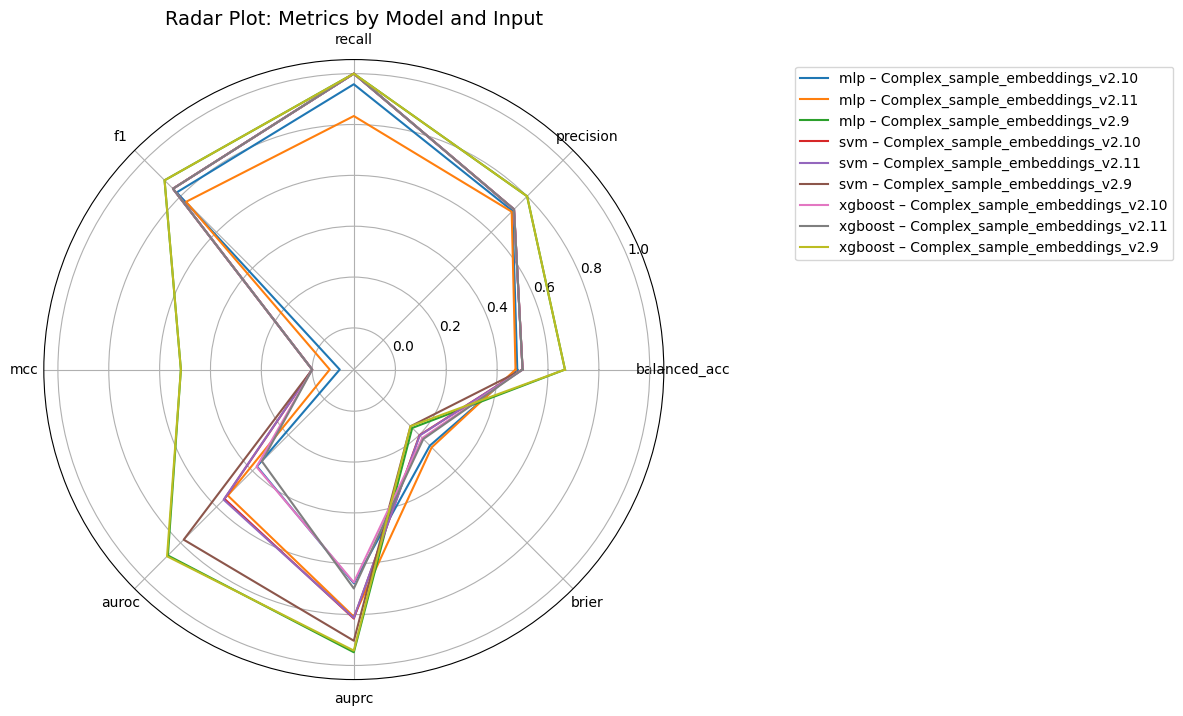

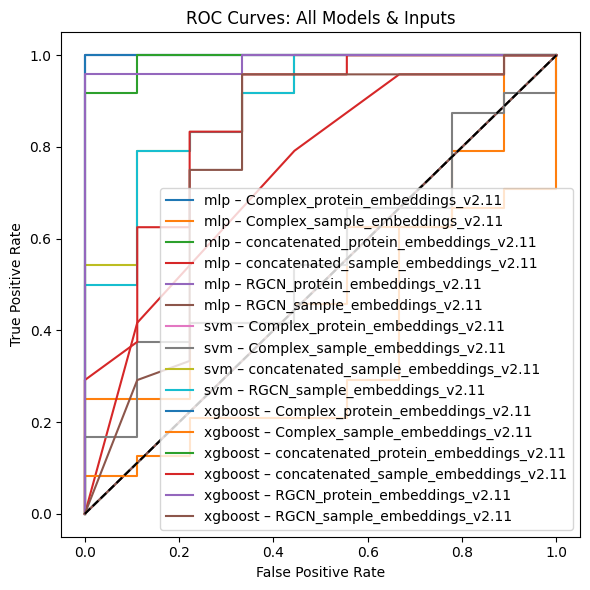

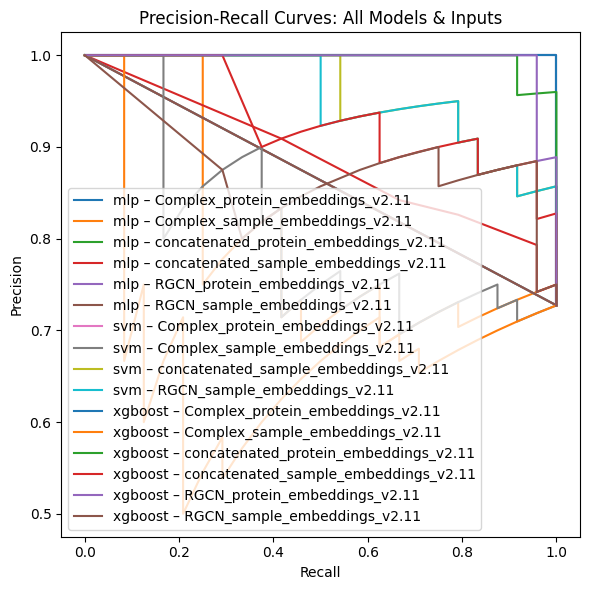

In [31]:
# -- same for Complex_sample embeddings
results_complex_sample_df=results_df[results_df['input'].str.contains('Complex_sample')]
results_complex_sample_df

dashboard = DashboardVisualizer(results_complex_sample_df, collector)
dashboard.plot_metric_grid()    
dashboard.plot_radar()
dashboard.plot_roc_curves()
dashboard.plot_pr_curves()

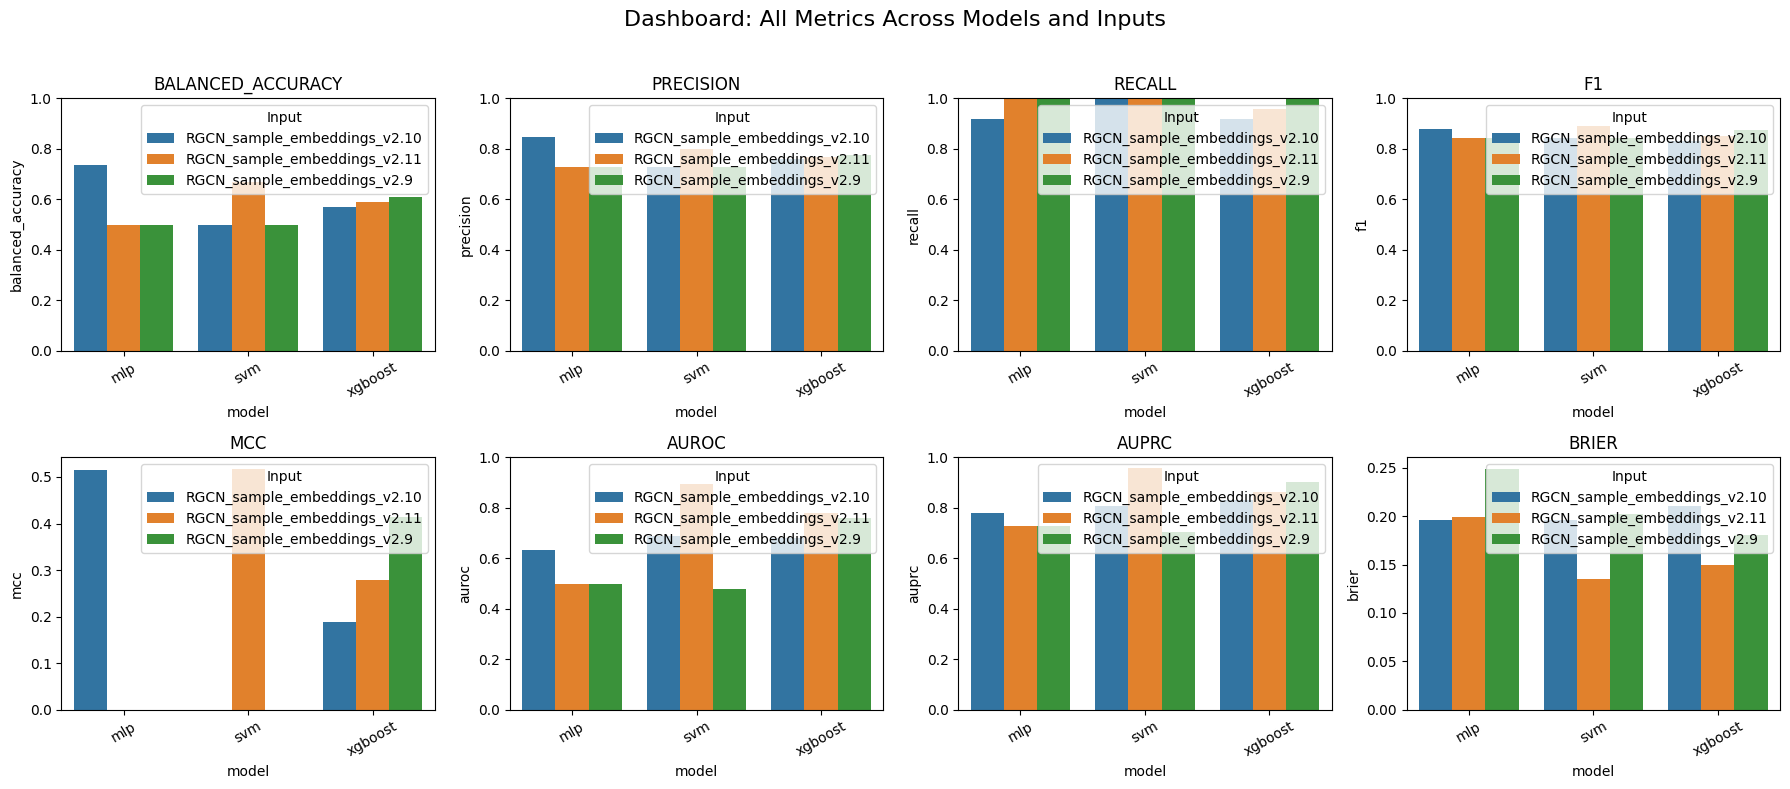

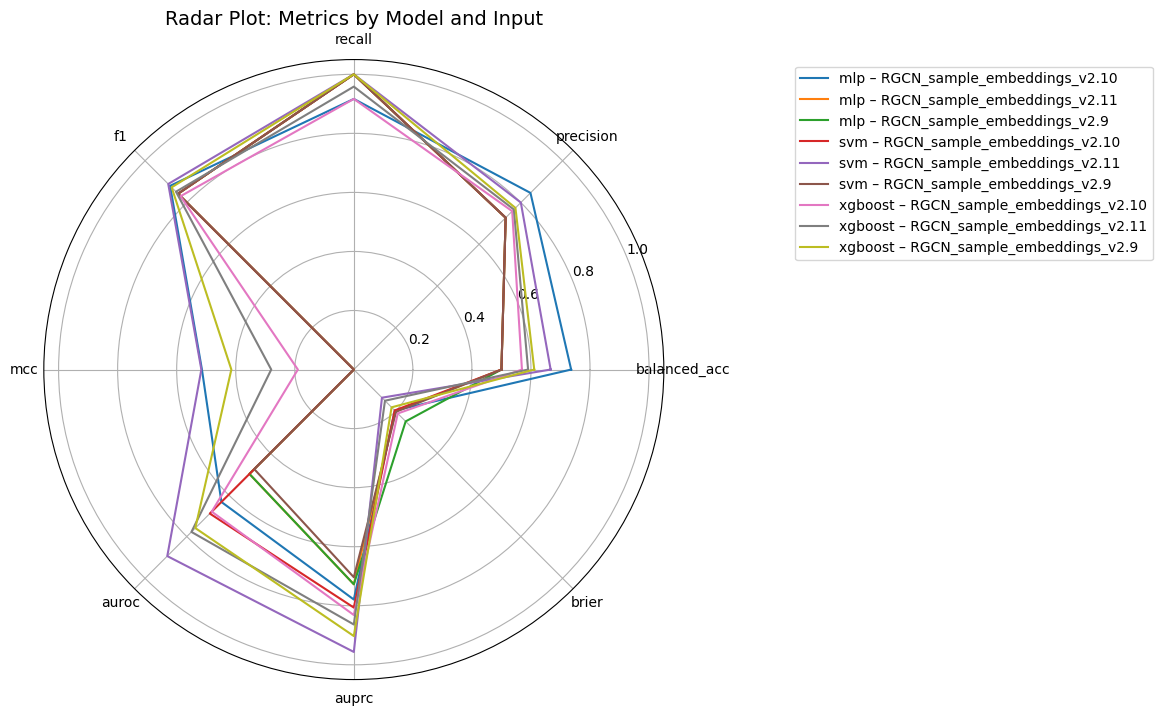

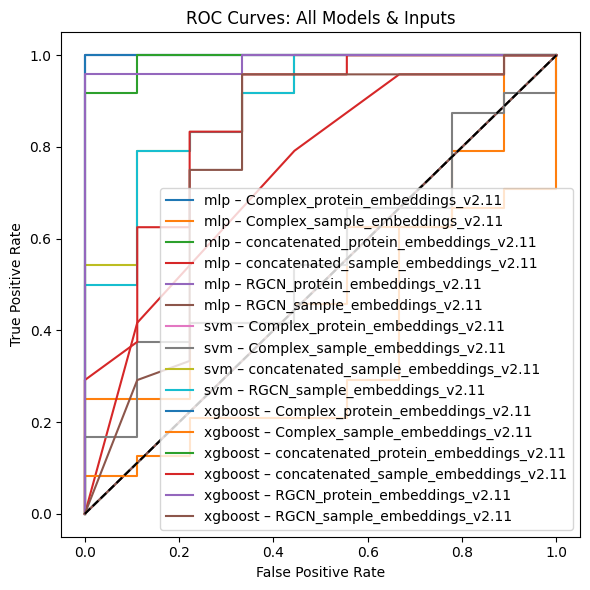

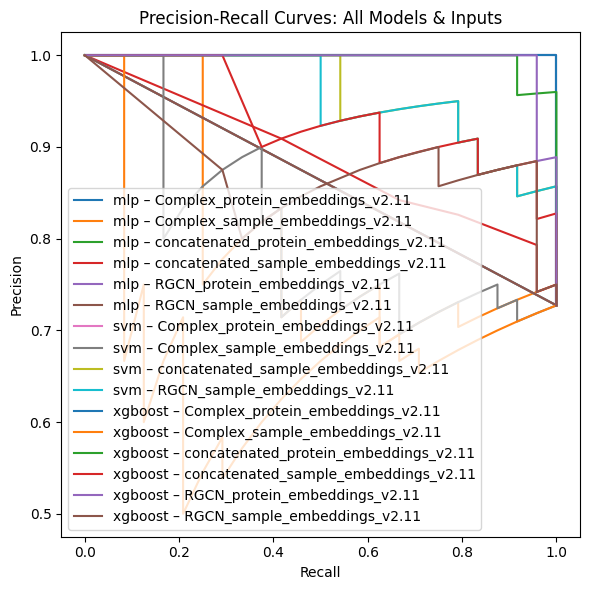

In [32]:
# -- for rgcn sample

results_rgcn_sample_df=results_df[results_df['input'].str.contains('RGCN_sample')]
results_rgcn_sample_df

dashboard = DashboardVisualizer(results_rgcn_sample_df, collector)
dashboard.plot_metric_grid()
dashboard.plot_radar()
dashboard.plot_roc_curves()
dashboard.plot_pr_curves()


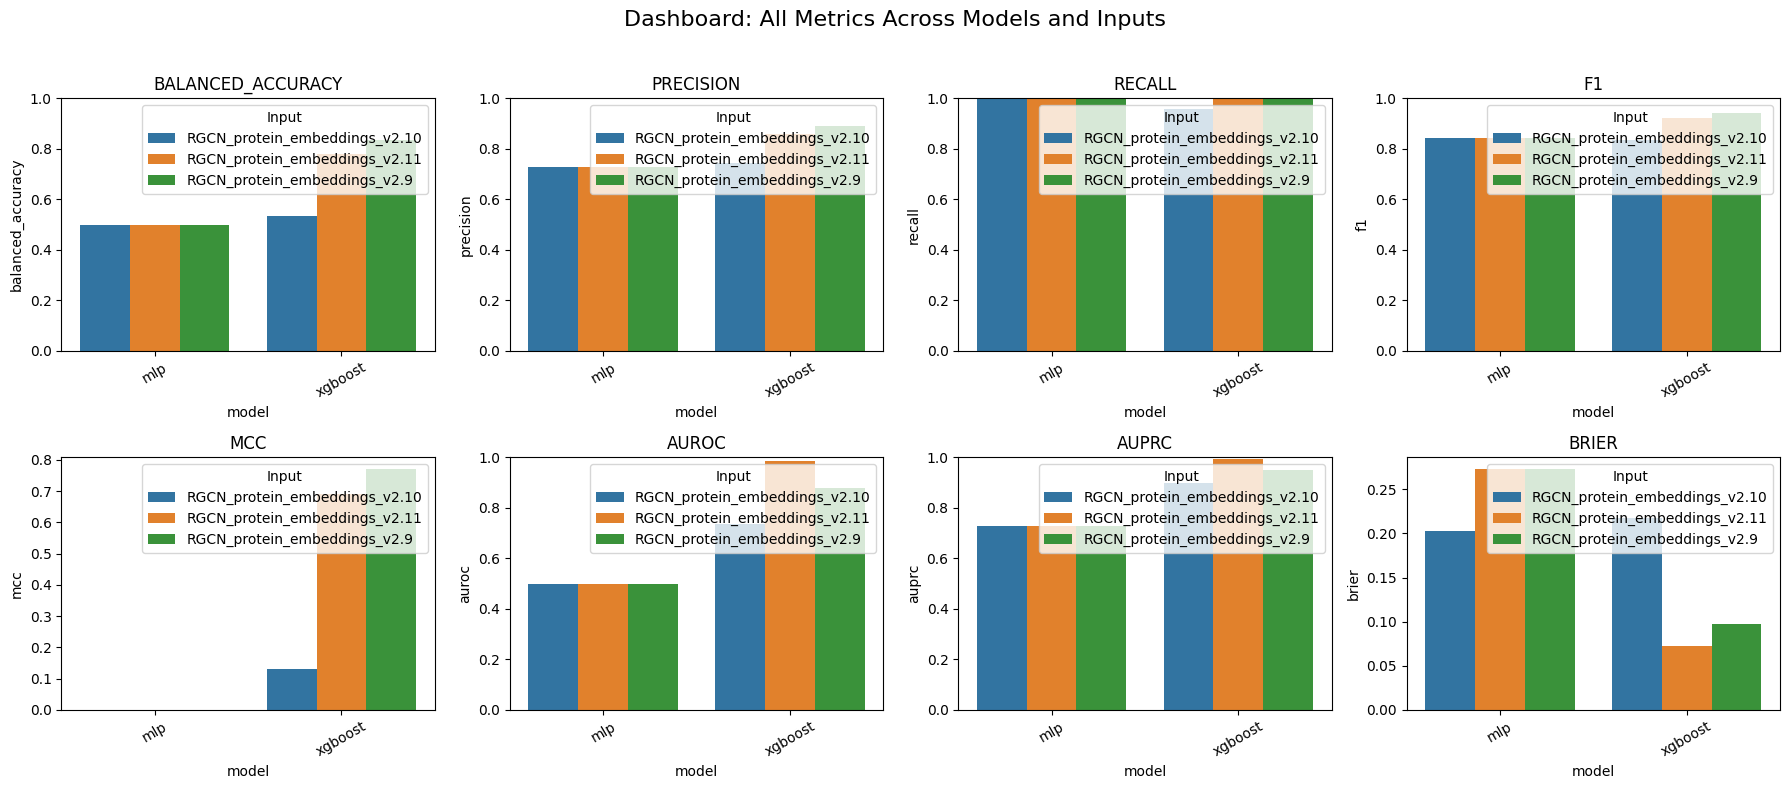

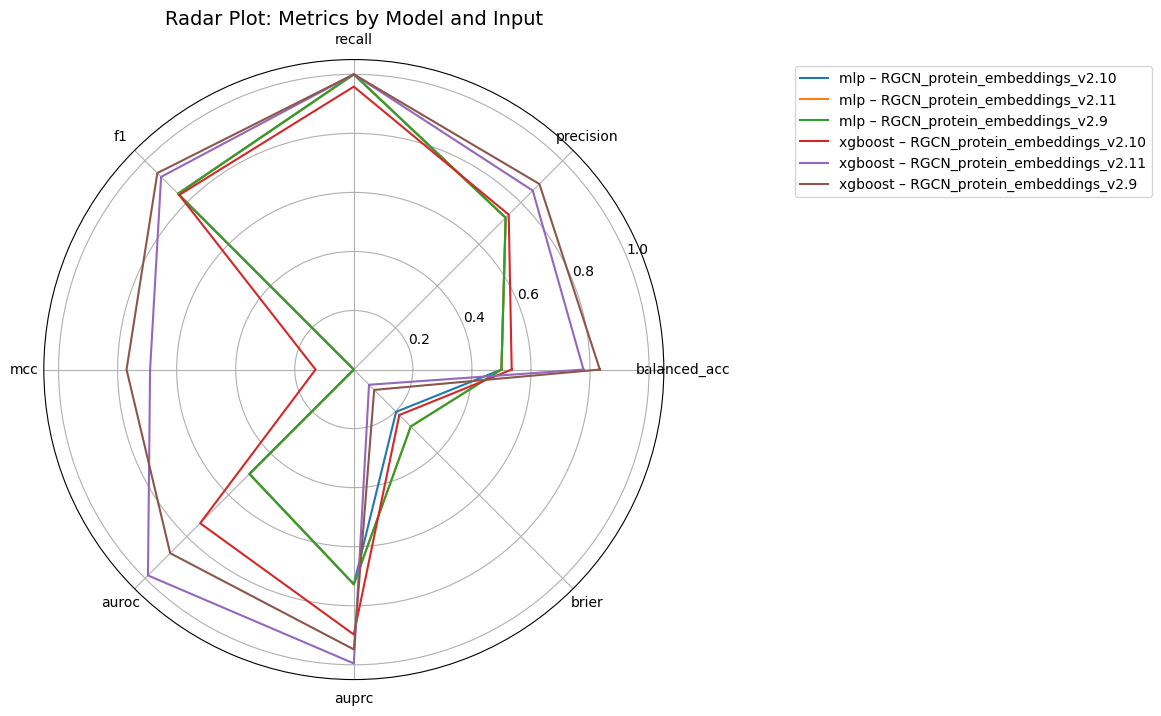

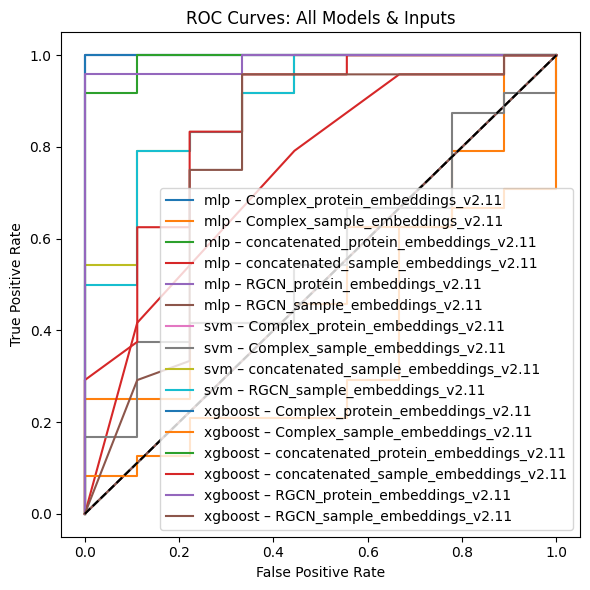

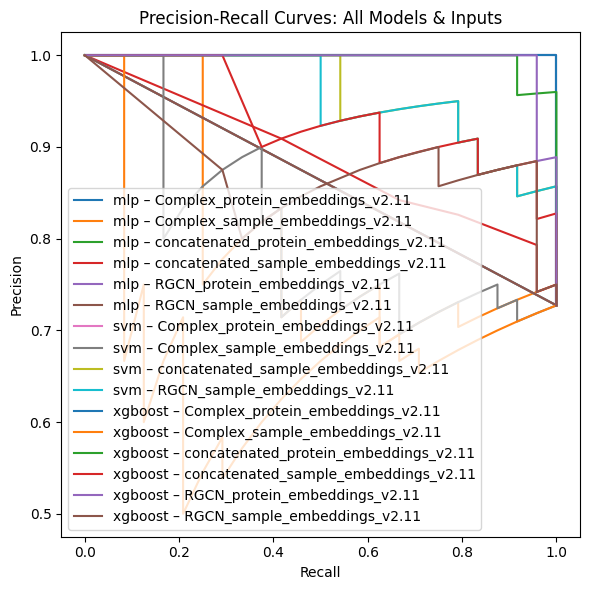

In [33]:
# -- for rgcn protein

results_rgcn_proteins_df=results_df[results_df['input'].str.contains('RGCN_protein')]
results_rgcn_proteins_df

dashboard = DashboardVisualizer(results_rgcn_proteins_df, collector)
dashboard.plot_metric_grid()
dashboard.plot_radar()
dashboard.plot_roc_curves()
dashboard.plot_pr_curves()
